## Getting the data

Let's say that someone has some data that they want us to analyze.

They grabbed it off the web as a CSV file, and then they imported the data into Excel, and they've shared both files with us.
* DatasaurusDozen.csv
* DatasaurusDozen.xlsx

## Plain text files

Open the file, put the data into a Python variable, and close the file

In [ ]:
f = open('DatasaurusDozen.csv','r')
a = f.readlines()
f.close()

or alternatively:

In [ ]:
with open('DatasaurusDozen.csv','r') as f:
    a = f.readlines()

The above has the advantage in that it:
* is a clear block of code for handling the file object
* automatically handles closing the file
* deals with exception handling (i.e. dealing with interruptions or errors in the normal execution of commands)

In [ ]:
len(a)

In [ ]:
a[0]

In [ ]:
a[1]

In [ ]:
a[1].strip().split(',')

In [ ]:
with open('DatasaurusDozen.csv','r') as f:
    col = f.readline()
    a = []
    for i in f.readlines():
        a.append(i.strip().split(','))

In [ ]:
print(col)

In [ ]:
print(a[0])

Definitely a way to handle the data...

but there are easier ways.

In [ ]:
import csv

In [ ]:
with open('DatasaurusDozen.csv','r') as f:
    x = csv.reader(f)

    # the return object of csv.reader is a "reader object", so we cast it to a list
    x = list(x)
    col = x[0]
    a = x[1:]

In [ ]:
col

In [ ]:
a[0]

The csv library has some useful ways to use CSV files, though at the moment the reading has abstracted too much.

The Excel spreadsheet is not a straight-forward text file for us to read, but....

"openpyxl is a Python library to read/write Excel 2010 xlsx/xlsm/xltx/xltm files. It was born from lack of existing library to read/write natively from Python the Office Open XML format." -- [OpenPyXL documentation](https://openpyxl.readthedocs.io/en/stable/)

In [ ]:
import openpyxl

In [ ]:
wb = openpyxl.load_workbook(filename = 'DatasaurusDozen.xlsx')

In [ ]:
wb.sheetnames

In [ ]:
sheet = wb['DatasaurusDozen']

In [ ]:
for i in sheet.values:
    print(i)

In [ ]:
col = list(sheet.values)[0]
a = list(sheet.values)[1:]

In [ ]:
col

In [ ]:
a[0]

Data manipulation in Python can be greatly facilitated with the Pandas library.

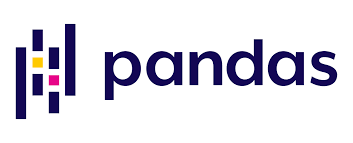

https://pandas.pydata.org/

Pandas data-manipulation capabilities are built on top of NumPy, utilizing its fast array processing, and its graphing capabilities are built on top of Matplotlib.

* "pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."

* It may be one of the most widely used tools for data munging

  * present data in nice formats
  * multiple convenient methods for filtering data
  * work with a variety of data formats (CSV, Excel, …)
  * convenient functions for quickly plotting data

* The name comes from panel data (and is also a play on python data analysis)

Pandas can be used to easily import a wide variety of file types. 

![Pandas-io](helpers/pandas-io-types.png)

See [Pandas IO tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [ ]:
import pandas as pd

As it so happens..... pandas has excellent functionality for work with csv files and excel spreadsheets (i.e. we don't necessarily need the csv or openpyxl libraries if we aren't doing more sophisticated things).

In [ ]:
a = pd.read_csv('DatasaurusDozen.csv')

In [ ]:
a

In [ ]:
a = pd.read_excel('DatasaurusDozen.xlsx')

In [ ]:
a

## JSON

Wanna use JSON instead?  Easy!

In [ ]:
a = pd.read_json('DatasaurusDozen.json')

In [ ]:
a

Of course, there are other considerations now, because JSON can have a different nested data structure.

In [ ]:
a = pd.read_json('DatasaurusDozen.json', orient='index').reset_index().explode(list('xy'), ignore_index=True)

In [ ]:
a

## CSV vs TSV

If the data file uses a different character to separate the data entries, you can still use read_csv.

Example:  TSV files are essentially just CSV files that use tab characters rather than commas for separating entries:

In [ ]:
a = pd.read_csv('DatasaurusDozen.tsv', delimiter='\t')

In [ ]:
a

# Pandas through the web

Lo and behold, you can even pass a website into Panda's read_csv

In [ ]:
a = pd.read_csv('https://docs.google.com/spreadsheets/d/1ZT4rK3KAPr3kNOSwRt_MJ2fRwWSApomInpyB_l_S4hg/export?format=csv&usp=sharing')

In [ ]:
a

Do note one thing:
* I had to change the url for sharing the google sheet:
  * https://docs.google.com/spreadsheets/d/1ZT4rK3KAPr3kNOSwRt_MJ2fRwWSApomInpyB_l_S4hg/edit?usp=sharing
* I changed the "edit?" to be "export?format=csv&"

For pd.read_csv, "Any valid string path is acceptable. The string could be a URL. Valid URL schemes include http, ftp, s3, gs, and file."
<br> --https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

This means you can import from AWS S3 buckets too! (though this further requires installing S3Fs and handling authentication variables)

## There are many ways to grab data, and many places from which to grab it.

## But now we will turn to what to do with our data now that we have it